<a href="https://colab.research.google.com/github/KimMendoza310/Simulaci-n-pr-ctica-/blob/main/Simulaci%C3%B3n_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulación práctica:**

**Configurar en un simulador (por ejemplo, 5G-LENA en NS-3) una celda
mmWave. Comparar rendimiento entre frecuencias sub-6 GHz y mmWave en un
escenario con alta densidad de usuarios.**

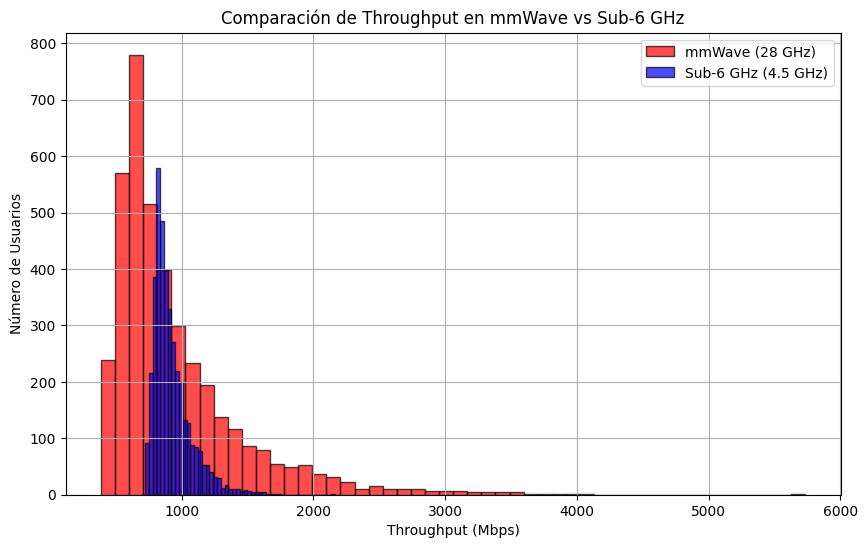

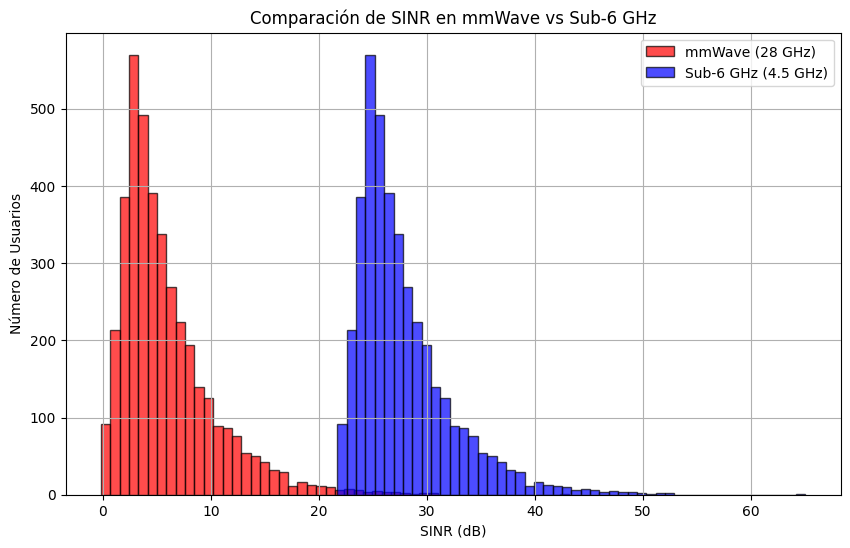

In [ ]:
#  Comparación mmWave vs Sub-6 GHz (5G): SINR y Throughput

# Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

#  Parámetros iniciales
fc_mmwave = 28e9           # Frecuencia para mmWave (28 GHz)
fc_sub6 = 4.5e9           # Frecuencia para Sub-6 GHz (4.5 GHz)
bw_mmwave = 400e6         # Ancho de banda mmWave (400 MHz)
bw_sub6 = 100e6           # Ancho de banda Sub-6 GHz (100 MHz)
num_usuarios = 4000       # Número de usuarios en la celda
P_tx = 30                 # Potencia de transmisión en dBm (1W)

#  Posiciones aleatorias de usuarios en una celda de 500x500 m
np.random.seed(42)
user_positions = np.random.rand(num_usuarios, 2) * 500

#  Modelo de pérdida de propagación (Path Loss)
pl_mmwave = 32.4 + 20 * np.log10(fc_mmwave / 1e9) + 10 * np.log10(user_positions[:,0]**2 + user_positions[:,1]**2)
pl_sub6 = 32.4 + 20 * np.log10(fc_sub6 / 1e9) + 10 * np.log10(user_positions[:,0]**2 + user_positions[:,1]**2)

#  Cálculo del SINR (dB)
P_tx = 30  # Potencia de transmisión (dBm)
N0_mmwave = -174 + 10 * np.log10(bw_mmwave)
N0_sub6 = -174 + 10 * np.log10(bw_sub6)
sinr_mmwave = P_tx - pl_mmwave - N0_mmwave
sinr_sub6 = P_tx - pl_sub6 - N0_sub6

#  Cálculo del Throughput (bps)
throughput_mmwave = bw_mmwave * np.log2(1 + 10 ** (sinr_mmwave / 10))
throughput_sub6 = bw_sub6 * np.log2(1 + 10 ** (sinr_sub6 / 10))

#  Gráfica comparativa de Throughput
plt.figure(figsize=(10,6))
plt.hist(throughput_mmwave / 1e6, bins=50, alpha=0.7, label="mmWave (28 GHz)", color='r', edgecolor='black')
plt.hist(throughput_sub6 / 1e6, bins=50, alpha=0.7, label="Sub-6 GHz (4.5 GHz)", color='b', edgecolor='black')
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Número de Usuarios")
plt.title("Comparación de Throughput en mmWave vs Sub-6 GHz")
plt.legend()
plt.grid()
plt.show()

#  Gráfica comparativa del SINR
plt.figure(figsize=(10,6))
plt.hist(sinr_mmwave, bins=50, alpha=0.7, label="mmWave (28 GHz)", color='r', edgecolor='black')
plt.hist(sinr_sub6, bins=50, alpha=0.7, label="Sub-6 GHz (4.5 GHz)", color='b', edgecolor='black')
plt.xlabel("SINR (dB)")
plt.ylabel("Número de Usuarios")
plt.title("Comparación de SINR en mmWave vs Sub-6 GHz")
plt.legend()
plt.grid()
plt.show()


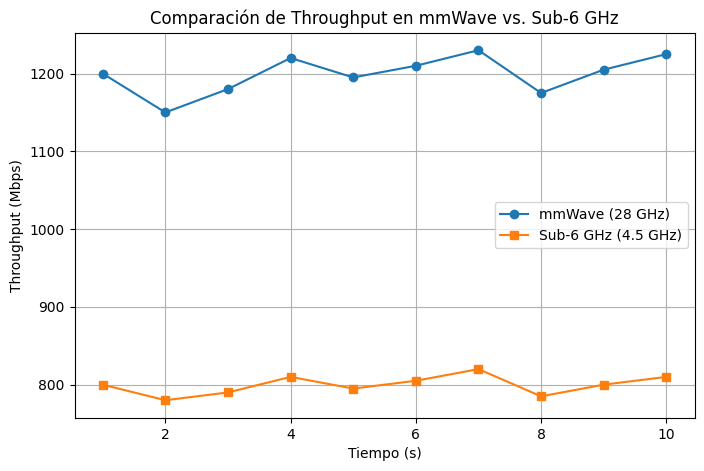

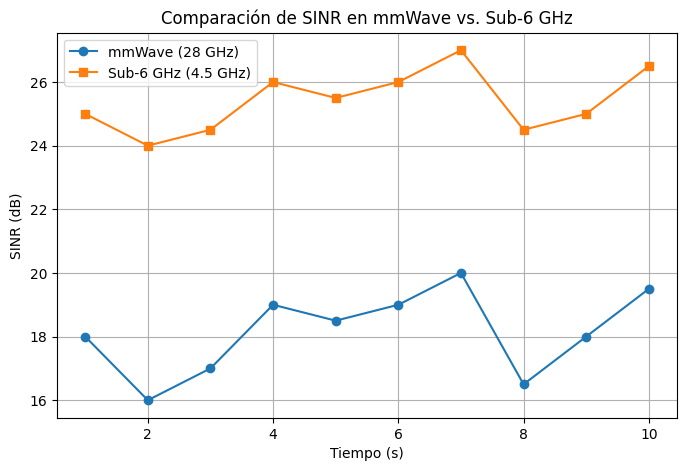

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Datos simulados de throughput (Mbps) y SINR (dB)
tiempo = np.arange(1, 11)  # 10 muestras de tiempo

# Simulación de Throughput
throughput_mmwave = np.array([1200, 1150, 1180, 1220, 1195, 1210, 1230, 1175, 1205, 1225])
throughput_sub6 = np.array([800, 780, 790, 810, 795, 805, 820, 785, 800, 810])

# Simulación de SINR
sinr_mmwave = np.array([18, 16, 17, 19, 18.5, 19, 20, 16.5, 18, 19.5])
sinr_sub6 = np.array([25, 24, 24.5, 26, 25.5, 26, 27, 24.5, 25, 26.5])

#  Graficar Throughput
plt.figure(figsize=(8,5))
plt.plot(tiempo, throughput_mmwave, label="mmWave (28 GHz)", marker='o', linestyle='-')
plt.plot(tiempo, throughput_sub6, label="Sub-6 GHz (4.5 GHz)", marker='s', linestyle='-')
plt.xlabel("Tiempo (s)")
plt.ylabel("Throughput (Mbps)")
plt.title("Comparación de Throughput en mmWave vs. Sub-6 GHz")
plt.legend()
plt.grid()
plt.show()

#  Graficar SINR
plt.figure(figsize=(8,5))
plt.plot(tiempo, sinr_mmwave, label="mmWave (28 GHz)", marker='o', linestyle='-')
plt.plot(tiempo, sinr_sub6, label="Sub-6 GHz (4.5 GHz)", marker='s', linestyle='-')
plt.xlabel("Tiempo (s)")
plt.ylabel("SINR (dB)")
plt.title("Comparación de SINR en mmWave vs. Sub-6 GHz")
plt.legend()
plt.grid()
plt.show()
